In [205]:
# Попытаемся получить отсутствующие значения годов постройки домов в Москве
# грузим модули
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [443]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [564]:
# грузим данные
stat_data = pd.read_csv('C:\\Users\\Uldum\\Downloads\\housing_market_dataset.csv')
stat_data

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Лифт,Ближайшая станция метро,Расстояние до метро,Ближайшая школа,Рейтинг школы,Адрес ближайшей школы,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа
0,https://move.ru/objects/moskva_ulica_baykalska...,"Продажа 1-комнатной квартиры, 31 м², Москва, у...",NaN,NaN,1967.0,NaN,NaN,125,3.0,ВП-738 СВОБОДНАЯ ПРОДАЖА. ДОМ ПОД СНОС. ЮРИДИЧ...,...,NaN,м. Щелковская,1294 м.,ГБОУ школа № 1352,Место в рейтинге №47,"107207,г.Москва, Щелковское ш., д. 77 А",190 м,NaN,NaN,3
1,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 83.2 м², Москва, ...","ЖК City Park («Сити Парк»), м. Выставочная",Отделка,2020.0,Элит класс,МЦК Деловой центр,202,1.0,Квартира премиум класса в ЖК CITY PARK с видам...,...,да,м. Выставочная,510 м.,ГБОУ школа № 2055,Место в рейтинге №456,"123100, г. Москва, ул. 2-я Черногрязская, дом 7",776 м,Пресненский,14 место из 58 в рейтинге районов,4
2,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продаю 2-комнатную квартиру, 89.6 м², Москва, ...","ЖК Silver (ЖК «Резиденции кинематографистов»),...",Отделка,2018.0,Бизнес класс,МЦК Ботанический сад,20,1.0,"Продается 2-комн. квартира, площадью 89.6 м2 в...",...,NaN,м. Свиблово,"12 мин, 1 км",ГБОУ Гимназия «Свиблово»,Место в рейтинге №28,"129323, г. Москва, ул. Седова, д. 4, корп. 1",619 м,Свиблово,15 место из 58 в рейтинге районов,2
3,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 55.8 м², Москва, ...","Новостройка «Некрасовка-Парк», 5 кв-л, корп. 1",Сдан,2019.0,Эконом класс,МЦК Шоссе Энтузиастов,15,1.0,Продаётся 2-к квартира площадью 55.8 кв.м. на ...,...,да,м. Лермонтовский проспект,"41 мин, 12 км",ГБОУ школа № 2053,Место в рейтинге №544,"111674, г. Москва, улица Покровская, дом 35",931 м,NaN,NaN,16
4,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продаю 3-комнатную квартиру, 128 м², Москва, Д...","ЖК «Дыхание», м. Тимирязевская",Сдан,2017.0,Элит класс,МЦК Окружная,42,3.0,Продаётся 3-к квартира площадью 128 кв.м. на 5...,...,да,м. Тимирязевская,"3 мин, 280 м",ГБОУ школа № 1236,Место в рейтинге №63,"127254, г. Москва, улица Яблочкова, дом 10",754 м,Тимирязевский,31 место из 58 в рейтинге районов,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаю 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 14-м этаже 15-этажно...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"117041, г. Москва, ул. Адмирала Руднева, д. 16...",~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,14
12997,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаем 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,48,1.0,Продается 1-к квартира на 15-м этаже 15-этажно...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"117041, г. Москва, ул. Адмирала Руднева, д. 16...",~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,15
12998,https://move.ru/objects/prodaetsya_2-komnatnay...,"Продам 2-комнатную квартиру, 70 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,60,1.0,Продается 2-к квартира на 2-м этаже 15-этажног...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"117041, г. Москва, ул. Адмирала Руднева, д. 16...",~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,2
12999,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продам 1-комнатную квартиру, 41 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 10-м этаже 15-этажно...,...,NaN,м. Бунинская Аллея,"20 мин, 1,7 км",ГБОУ школа № 2009,Место в рейтинге №17,"

In [565]:
# смотрим в данные, думаем какие колонки могут нам понадобиться. Рассуждения в статье ВК.
# Год постройки - целевая колонка
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            13001 non-null  object 
 1   Заголовок                      13001 non-null  object 
 2   Новостройка                    6080 non-null   object 
 3   Этап строительства             5812 non-null   object 
 4   Год постройки                  7025 non-null   float64
 5   Класс жилья                    5812 non-null   object 
 6   МЦК                            7633 non-null   object 
 7   Кол-во просмотров              13001 non-null  int64  
 8   Кол-во просмотров сегодня      7224 non-null   float64
 9   Описание                       12263 non-null  object 
 10  Информация                     13001 non-null  object 
 11  Адрес                          13001 non-null  object 
 12  Тип здания                     12897 non-null 

<AxesSubplot:>

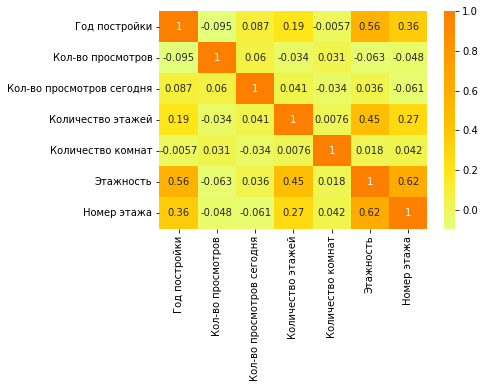

In [566]:
# тепловая карта, просто глянуть от чего больше зависит Год постройки
#  довольно логично, что этажность дания больше влияет на год (точнее наоборот, но кому какое дело)
corr = stat_data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [567]:
# Наша первая колонка, посмотрим что с ней не так
stat_data['Тип здания'].value_counts()

Монолитное             5232
Кирпичное              4491
Блочное                1663
Монолитно-кирпичное     703
Панельное               594
Монолитно-кирпичный     156
Сталинское               45
Монолитный               10
Панельный                 2
Панельно-кирпичное        1
Name: Тип здания, dtype: int64

In [574]:
# Мне не нравятся типы количеством до 100, плюс Монолитно-кирпичное = = Монолитно-кирпичный. Исправим ошибку, уберём лишнее
# Создаем новую колонку и исправляем ошибки, выводим подсчёт значений
stat_data['constr_type'] = stat_data['Тип здания'].apply(lambda x: 'Монолитно-кирпичное' if x == 'Монолитно-кирпичный' else x)
stat_data = stat_data.loc[stat_data['constr_type'] != 'Сталинское']
stat_data['constr_type'].value_counts()

Монолитное             5232
Кирпичное              4491
Блочное                1663
Монолитно-кирпичное     859
Панельное               594
Name: constr_type, dtype: int64

In [575]:
#  так получше будет. Теперь разделим эту колонку по категориям в разные колонки и присвоим 0 и 1, вместо названий типа
# используем метод Дуумис на нужную колонку, она разделится на 5 доп колонок
stat_data = pd.concat([stat_data, pd.get_dummies(stat_data['constr_type'], drop_first=False)], axis=1)
stat_data

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа,constr_type,Блочное,Кирпичное,Монолитно-кирпичное,Монолитное,Панельное
0,https://move.ru/objects/moskva_ulica_baykalska...,"Продажа 1-комнатной квартиры, 31 м², Москва, у...",NaN,NaN,1967.0,NaN,NaN,125,3.0,ВП-738 СВОБОДНАЯ ПРОДАЖА. ДОМ ПОД СНОС. ЮРИДИЧ...,...,190 м,NaN,NaN,3,Панельное,0,0,0,0,1
1,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 83.2 м², Москва, ...","ЖК City Park («Сити Парк»), м. Выставочная",Отделка,2020.0,Элит класс,МЦК Деловой центр,202,1.0,Квартира премиум класса в ЖК CITY PARK с видам...,...,776 м,Пресненский,14 место из 58 в рейтинге районов,4,Монолитно-кирпичное,0,0,1,0,0
2,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продаю 2-комнатную квартиру, 89.6 м², Москва, ...","ЖК Silver (ЖК «Резиденции кинематографистов»),...",Отделка,2018.0,Бизнес класс,МЦК Ботанический сад,20,1.0,"Продается 2-комн. квартира, площадью 89.6 м2 в...",...,619 м,Свиблово,15 место из 58 в рейтинге районов,2,Монолитное,0,0,0,1,0
3,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 55.8 м², Москва, ...","Новостройка «Некрасовка-Парк», 5 кв-л, корп. 1",Сдан,2019.0,Эконом класс,МЦК Шоссе Энтузиастов,15,1.0,Продаётся 2-к квартира площадью 55.8 кв.м. на ...,...,931 м,NaN,NaN,16,Монолитное,0,0,0,1,0
4,https://move.ru/objects/prodaetsya_3-komn_kvar...,"Продаю 3-комнатную квартиру, 128 м², Москва, Д...","ЖК «Дыхание», м. Тимирязевская",Сдан,2017.0,Элит класс,МЦК Окружная,42,3.0,Продаётся 3-к квартира площадью 128 кв.м. на 5...,...,754 м,Тимирязевский,31 место из 58 в рейтинге районов,5,Монолитное,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаю 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 14-м этаже 15-этажно...,...,~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,14,Монолитно-кирпичное,0,0,1,0,0
12997,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаем 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,48,1.0,Продается 1-к квартира на 15-м этаже 15-этажно...,...,~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,15,Монолитно-кирпичное,0,0,1,0,0
12998,https://move.ru/objects/prodaetsya_2-komnatnay...,"Продам 2-комнатную квартиру, 70 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,60,1.0,Продается 2-к квартира на 2-м этаже 15-этажног...,...,~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,2,Монолитно-кирпичное,0,0,1,0,0
12999,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продам 1-комнатную квартиру, 41 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 10-м этаже 15-этажно...,...,~ 1.2 км,Южное Бутово,49 место из 58 в рейтинге районов,10,Монолитно-кирпичное,0,0,1,0,0


In [576]:
# перейдём к следующей колонке - количесвто этажей. Создадим новую, переименованную
stat_data['floor_nums'] = stat_data['Количество этажей']
# методами запросов уберём выбросы, не идеал, но будет почище. Небоскрёбы нам не особо нужны, как и малоэтажки
stat_data = stat_data.query("floor_nums <= 30.0")
stat_data = stat_data.query("floor_nums > 4.0")
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 13000
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            11231 non-null  object 
 1   Заголовок                      11231 non-null  object 
 2   Новостройка                    4889 non-null   object 
 3   Этап строительства             4689 non-null   object 
 4   Год постройки                  5584 non-null   float64
 5   Класс жилья                    4689 non-null   object 
 6   МЦК                            6277 non-null   object 
 7   Кол-во просмотров              11231 non-null  int64  
 8   Кол-во просмотров сегодня      5881 non-null   float64
 9   Описание                       10494 non-null  object 
 10  Информация                     11231 non-null  object 
 11  Адрес                          11231 non-null  object 
 12  Тип здания                     11131 non-null 

In [577]:
# колонка Цена за м.кв. Убираем лишние символы, оставляем только цену и переводим в Integer тип данных
stat_data['price_for_sqr'] = stat_data['цена за м²'].apply(lambda x: int(re.sub("\D", "", x)))
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 13000
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            11231 non-null  object 
 1   Заголовок                      11231 non-null  object 
 2   Новостройка                    4889 non-null   object 
 3   Этап строительства             4689 non-null   object 
 4   Год постройки                  5584 non-null   float64
 5   Класс жилья                    4689 non-null   object 
 6   МЦК                            6277 non-null   object 
 7   Кол-во просмотров              11231 non-null  int64  
 8   Кол-во просмотров сегодня      5881 non-null   float64
 9   Описание                       10494 non-null  object 
 10  Информация                     11231 non-null  object 
 11  Адрес                          11231 non-null  object 
 12  Тип здания                     11131 non-null 

In [578]:
# выводим количество каждого значения, просто чтобы поофигевать от цены за квадратный метр в Москве
stat_data['price_for_sqr'].value_counts()

200000    120
250000     50
150000     48
217857     36
240000     35
         ... 
91398       1
229091      1
137697      1
158105      1
81909       1
Name: price_for_sqr, Length: 5798, dtype: int64

In [579]:
# Следующая колонка. Создаем переименованную, запросами убираем дворцы с более чем 7 комнатами.
stat_data['rooms_nums'] = stat_data['Количество комнат']
stat_data = stat_data.query("rooms_nums <= 7")
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 0 to 13000
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            11227 non-null  object 
 1   Заголовок                      11227 non-null  object 
 2   Новостройка                    4888 non-null   object 
 3   Этап строительства             4688 non-null   object 
 4   Год постройки                  5582 non-null   float64
 5   Класс жилья                    4688 non-null   object 
 6   МЦК                            6276 non-null   object 
 7   Кол-во просмотров              11227 non-null  int64  
 8   Кол-во просмотров сегодня      5878 non-null   float64
 9   Описание                       10490 non-null  object 
 10  Информация                     11227 non-null  object 
 11  Адрес                          11227 non-null  object 
 12  Тип здания                     11127 non-null 

In [580]:
# общая площадь квартиры. Убираем лишние символы, интеджирим тип, отсеиваем всё, что больше 100 квадратов
stat_data['area_of_app'] = stat_data['Общая площадь'].apply(lambda x: int(re.sub("\D", "", x)))
stat_data = stat_data.query("area_of_app <= 100")
stat_data['area_of_app'].value_counts()

31    333
39    286
42    280
43    279
40    268
     ... 
22      7
21      6
20      5
18      4
14      1
Name: area_of_app, Length: 84, dtype: int64

In [581]:
# С этой колонкой пришлось повозиться. Люди вписывают данные как попало - лишняя работа для Дата-саенс. Так или иначе,
# убрали лишние символы, зафлоутили тип данных
stat_data['area_of_kitch'] = stat_data['Площадь кухни'].apply(lambda x: float(x.split()[0]) if type(x) == str else float(x))
# отсеяли площади меньше 3 и больше 20 квдаратов
stat_data = stat_data.query("area_of_kitch <= 20.0")
stat_data = stat_data.query("area_of_kitch >= 3.0")
stat_data['area_of_kitch'].describe()

count    8571.000000
mean       10.244379
std         3.128265
min         3.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        20.000000
Name: area_of_kitch, dtype: float64

In [582]:
# Лифт. Сначала заполнили пустые ячейки как Нет (нет лифта), потом заменили все значения на 'No_elev', 'Is_elev', чтобы
# потом было проще применять мтеод Дууми 
stat_data['elevator'] = stat_data['Лифт'].fillna('нет')
stat_data['elevator'] = np.where(stat_data["elevator"] == "нет", 'No_elev', 'Is_elev')
stat_data['elevator'].value_counts()

Is_elev    7120
No_elev    1451
Name: elevator, dtype: int64

In [583]:
# применяем метод Дууми, появляются 2 доп колонки 'No_elev', 'Is_elev' со значениями 0 или 1
stat_data = pd.concat([stat_data, pd.get_dummies(stat_data['elevator'], drop_first=False)], axis=1)
stat_data

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Монолитное,Панельное,floor_nums,price_for_sqr,rooms_nums,area_of_app,area_of_kitch,elevator,Is_elev,No_elev
0,https://move.ru/objects/moskva_ulica_baykalska...,"Продажа 1-комнатной квартиры, 31 м², Москва, у...",NaN,NaN,1967.0,NaN,NaN,125,3.0,ВП-738 СВОБОДНАЯ ПРОДАЖА. ДОМ ПОД СНОС. ЮРИДИЧ...,...,0,1,5.0,169355,1,31,5.5,No_elev,0,1
6,https://move.ru/objects/moskva_novovatutinskiy...,"Продажа 1-комнатной квартиры, 38 м², Троицк, Н...","ЖК «Новые Ватутинки», мкр. Центральный, корп. 9",Сдан,NaN,Эконом класс,NaN,4267,1.0,"""Новые Ватутинки"" (микрорайон Центральный) - э...",...,0,1,17.0,92525,1,38,7.0,Is_elev,1,0
7,https://move.ru/objects/moskva_novovatutinskiy...,"Продаю 2-комнатную квартиру, 62 м², Троицк, Но...","ЖК «Новые Ватутинки», мкр. Центральный, корп. 9",Сдан,NaN,Эконом класс,NaN,4408,3.0,В первую очередь при проектировании микрорайон...,...,0,1,17.0,100161,2,62,12.0,Is_elev,1,0
8,https://move.ru/objects/moskva_novovatutinskiy...,"Продаем 3-комнатную квартиру, 80 м², Троицк, Н...","ЖК «Новые Ватутинки», мкр. Центральный, корп. 9",Сдан,NaN,Эконом класс,NaN,3131,2.0,В Новых Ватутинках (микрорайон Центральный) вс...,...,0,1,17.0,88817,3,80,12.0,Is_elev,1,0
9,https://move.ru/objects/moskva_novovatutinskiy...,"Продажа 1-комнатной квартиры, 39 м², Троицк, Н...","ЖК «Новые Ватутинки», мкр. Центральный, корп. 9",Сдан,NaN,Эконом класс,NaN,2928,3.0,Застройщик Инвесттраст предлагает идеальный ва...,...,0,1,17.0,100211,1,39,10.0,Is_elev,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаю 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 14-м этаже 15-этажно...,...,0,0,15.0,104912,1,40,8.0,No_elev,0,1
12997,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продаем 1-комнатную квартиру, 40 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,48,1.0,Продается 1-к квартира на 15-м этаже 15-этажно...,...,0,0,15.0,104912,1,40,8.0,No_elev,0,1
12998,https://move.ru/objects/prodaetsya_2-komnatnay...,"Продам 2-комнатную квартиру, 70 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,60,1.0,Продается 2-к квартира на 2-м этаже 15-этажног...,...,0,0,15.0,81909,2,70,14.0,No_elev,0,1
12999,https://move.ru/objects/prodaetsya_1-komnatnay...,"Продам 1-комнатную квартиру, 41 м², Москва","ЖК «Белые ночи», м. Бунинская аллея",Отделка,2019.0,Комфорт класс,МЦК Крымская,50,1.0,Продается 1-к квартира на 10-м этаже 15-этажно...,...,0,0,15.0,100748,1,41,8.0,No_elev,0,1


In [585]:
# выводим посмотреть - чо там как с лифтами дело обстоит в колонке No_elev
stat_data.No_elev.value_counts()

0    7120
1    1451
Name: No_elev, dtype: int64

In [ ]:
# На этом обработку данных я закончу. Убилось очень много времени.
# Составим итоговый Датафрейм из нужных колонок нашего базового измененного Датафрейма

In [584]:
# составляем лист нужных колонок
total_list = ['Is_elev', 'No_elev', 'area_of_kitch', 'area_of_app', 'rooms_nums', 'price_for_sqr', 'floor_nums', 'Панельное', 'Монолитное',
             'Монолитно-кирпичное', 'Кирпичное', 'Блочное', 'Год постройки']

In [586]:
# создаем итоговый ДФ по нужным колонкам старого
total_df = stat_data[['Is_elev', 'No_elev', 'area_of_kitch', 'area_of_app', 'rooms_nums', 'price_for_sqr', 'floor_nums', 'Панельное', 'Монолитное',
             'Монолитно-кирпичное', 'Кирпичное', 'Блочное', 'Год постройки']]
total_df

,Is_elev,No_elev,area_of_kitch,area_of_app,rooms_nums,price_for_sqr,floor_nums,Панельное,Монолитное,Монолитно-кирпичное,Кирпичное,Блочное,Год постройки
0,0,1,5.5,31,1,169355,5.0,1,0,0,0,0,1967.0
6,1,0,7.0,38,1,92525,17.0,1,0,0,0,0,NaN
7,1,0,12.0,62,2,100161,17.0,1,0,0,0,0,NaN
8,1,0,12.0,80,3,88817,17.0,1,0,0,0,0,NaN
9,1,0,10.0,39,1,100211,17.0,1,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,0,1,8.0,40,1,104912,15.0,0,0,1,0,0,2019.0
12997,0,1,8.0,40,1,104912,15.0,0,0,1,0,0,2019.0
12998,0,1,14.0,70,2,81909,15.0,0,0,1,0,0,2019.0
12999,0,1,8.0,41,1,100748,15.0,0,0,1,0,0,2019.0


In [587]:
# переименуем колонки на англицкий манер, без пробелов
total_df.rename(columns={'Панельное': 'Panel', 'Монолитное': 'Monolith', 'Монолитно-кирпичное': 'Mon_brick',
                        'Кирпичное': 'Brick', 'Блочное': 'Block', 'Год постройки': 'year_constr'}, inplace=True)
total_df

,Is_elev,No_elev,area_of_kitch,area_of_app,rooms_nums,price_for_sqr,floor_nums,Panel,Monolith,Mon_brick,Brick,Block,year_constr
0,0,1,5.5,31,1,169355,5.0,1,0,0,0,0,1967.0
6,1,0,7.0,38,1,92525,17.0,1,0,0,0,0,NaN
7,1,0,12.0,62,2,100161,17.0,1,0,0,0,0,NaN
8,1,0,12.0,80,3,88817,17.0,1,0,0,0,0,NaN
9,1,0,10.0,39,1,100211,17.0,1,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,0,1,8.0,40,1,104912,15.0,0,0,1,0,0,2019.0
12997,0,1,8.0,40,1,104912,15.0,0,0,1,0,0,2019.0
12998,0,1,14.0,70,2,81909,15.0,0,0,1,0,0,2019.0
12999,0,1,8.0,41,1,100748,15.0,0,0,1,0,0,2019.0


In [588]:
# нормализуем данные, составляем список колонок для нормализации (все числовые, кроме категориальных-булевых (1 и 0))
continuous = ['area_of_kitch', 'area_of_app', 'rooms_nums', 'price_for_sqr', 'floor_nums']
# делаем ормализацию с помощью класса СтандартСкаллер
scaler = StandardScaler()
# в цикле for для каждого значения из списка 'continuous' меняем тип данных и фитим (fit_transform) для нормализации
# без .values.reshape(-1, 1) появляется ошибка, которая просит изменить форму массива  
for var in continuous:
    total_df[var] = total_df[var].astype('float64')
    total_df[var] = scaler.fit_transform(total_df[var].values.reshape(-1,1))
# выводим посмотреть нормализацию    
total_df

,Is_elev,No_elev,area_of_kitch,area_of_app,rooms_nums,price_for_sqr,floor_nums,Panel,Monolith,Mon_brick,Brick,Block,year_constr
0,0,1,-1.516705,-1.053775,-1.145718,-0.263399,-1.524810,1,0,0,0,0,1967.0
6,1,0,-1.037178,-0.644085,-1.145718,-1.578438,0.467210,1,0,0,0,0,NaN
7,1,0,0.561245,0.760566,0.198928,-1.447739,0.467210,1,0,0,0,0,NaN
8,1,0,0.561245,1.814054,1.543573,-1.641905,0.467210,1,0,0,0,0,NaN
9,1,0,-0.078124,-0.585558,-1.145718,-1.446883,0.467210,1,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,0,1,-0.717494,-0.527031,-1.145718,-1.366420,0.135207,0,0,1,0,0,2019.0
12997,0,1,-0.717494,-0.527031,-1.145718,-1.366420,0.135207,0,0,1,0,0,2019.0
12998,0,1,1.200615,1.228783,0.198928,-1.760144,0.135207,0,0,1,0,0,2019.0
12999,0,1,-0.717494,-0.468504,-1.145718,-1.437692,0.135207,0,0,1,0,0,2019.0


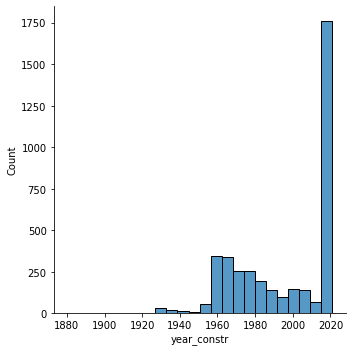

In [589]:
# вроде всё норм, построим целевую колонку, ужаснёмся распределением
sns.displot(data=total_df['year_constr'])

In [ ]:
# Распределение так себе, конечно, но я пока сделать с этим ничего не могу. Где-то дальше отрежем выбросы.

In [591]:
# Делим ДФ на X - признаки и y - ответы к признакам. Заодно убираем строки с NaN значениями, через запрос отрезаем
# выбросы по году постройки и дропаем/вызываем колонку year_constr в X и y соответственно
X = total_df.loc[total_df['year_constr'].notna()].query('year_constr >= 1920').drop(columns = ['year_constr'])
y = total_df.loc[total_df['year_constr'].notna()].query('year_constr >= 1920').year_constr
X

,Is_elev,No_elev,area_of_kitch,area_of_app,rooms_nums,price_for_sqr,floor_nums,Panel,Monolith,Mon_brick,Brick,Block
0,0,1,-1.516705,-1.053775,-1.145718,-0.263399,-1.524810,1,0,0,0,0
22,1,0,-0.078124,2.048163,1.543573,-0.350161,-0.030795,1,0,0,0,0
39,0,1,1.839984,-0.819667,-1.145718,-0.570225,0.135207,0,1,0,0,0
62,0,1,-0.717494,-0.761139,-1.145718,-1.529743,0.467210,0,0,0,0,0
63,0,1,-0.717494,0.409403,0.198928,-1.745441,0.467210,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12996,0,1,-0.717494,-0.527031,-1.145718,-1.366420,0.135207,0,0,1,0,0
12997,0,1,-0.717494,-0.527031,-1.145718,-1.366420,0.135207,0,0,1,0,0
12998,0,1,1.200615,1.228783,0.198928,-1.760144,0.135207,0,0,1,0,0
12999,0,1,-0.717494,-0.468504,-1.145718,-1.437692,0.135207,0,0,1,0,0


In [592]:
# через метод трейн_тест_сплит делим данные на тестовые и трейновые в соотношении 10 к 1.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13, test_size = 0.10)

In [ ]:
# В итоге мы получили в X_train данные всех колонок итогового датафрэйма без целевой колонки, строки все, где есть значения
# о годе постройки.
# в y_train у нас год постройки - это ответы к обучению сети
# минус 10% данных на тест, само собой. Они в X_test, y_test

In [593]:
# это признаки данных, год постройки здания которых нужно предсказать (сам не понял что написал, но понял)
X_need_to_pred = total_df.loc[total_df['year_constr'].isna()].drop(columns = ['year_constr'])
X_need_to_pred

,Is_elev,No_elev,area_of_kitch,area_of_app,rooms_nums,price_for_sqr,floor_nums,Panel,Monolith,Mon_brick,Brick,Block
6,1,0,-1.037178,-0.644085,-1.145718,-1.578438,0.467210,1,0,0,0,0
7,1,0,0.561245,0.760566,0.198928,-1.447739,0.467210,1,0,0,0,0
8,1,0,0.561245,1.814054,1.543573,-1.641905,0.467210,1,0,0,0,0
9,1,0,-0.078124,-0.585558,-1.145718,-1.446883,0.467210,1,0,0,0,0
10,1,0,-0.078124,1.579946,1.543573,-1.665389,0.467210,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12012,0,1,-1.356863,0.116767,1.543573,-0.410102,-0.860803,1,0,0,0,0
12016,0,1,-0.237966,0.936147,1.543573,-0.344530,0.301209,1,0,0,0,0
12019,0,1,-1.037178,0.643512,1.543573,-0.994056,-0.860803,1,0,0,0,0
12020,0,1,-1.356863,0.643512,1.543573,-0.466312,-0.860803,0,0,0,1,0


In [499]:
# выращиваем гомункула, накидываем структуру сети из 3х слоёв: входной, выходной, скрытый
tf.keras.utils.set_random_seed(13)
model = Sequential()
# тут 12 - чисо каналов по входящим признакам (колонкам), выбраны топ функции активации - ))
model.add(Dense(60, input_shape=(12,), activation='selu'))
#  батч-нормализация...нормализаци много не бывает, нормализует данные в батчах (размер их зададим дальше)
model.add(BatchNormalization())
# тут всё понятно, просто слой
model.add(Dense(120, activation='selu'))
model.add(BatchNormalization())
# тут 1 на выходе - потому что регрессия, то есть нам нужно одно значение, а не указать вероятность класса, например
# линейнаяфункция по тестам себя лучше показала (да, было мноо тестов всяких параметров)
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 60)                780       
                                                                 
 batch_normalization_26 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 dense_41 (Dense)            (None, 120)               7320      
                                                                 
 batch_normalization_27 (Bat  (None, 120)              480       
 chNormalization)                                                
                                                                 
 dense_42 (Dense)            (None, 1)                 121       
                                                                 
Total params: 8,941
Trainable params: 8,581
Non-train

In [542]:
# компилируем. Оптимизатор В ИТОГЕ был выбран этот...среди многих, лосс стандартный для регрессии - средняя ошибка
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), loss='mean_absolute_error', metrics=['mae'])

In [543]:
# наконец фитим (фитил раз 100 на самом деле), параметры постоянно менялись, оставил эти "по опыту"
model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.25)

Epoch 1/100
21/21 [==============================] - 2s 19ms/step - loss: 4.6896 - mae: 4.6896 - val_loss: 5.2224 - val_mae: 5.2224
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 4.6250 - mae: 4.6250 - val_loss: 5.2346 - val_mae: 5.2346
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 4.7022 - mae: 4.7022 - val_loss: 4.9234 - val_mae: 4.9234
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 4.5027 - mae: 4.5027 - val_loss: 5.1051 - val_mae: 5.1051
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 4.5893 - mae: 4.5893 - val_loss: 4.7918 - val_mae: 4.7918
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 4.4683 - mae: 4.4683 - val_loss: 4.8707 - val_mae: 4.8707
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 4.4653 - mae: 4.4653 - val_loss: 4.9227 - val_mae: 4.9227
Epoch 8/100
21/21 [==============================] - 0s 8ms/step - loss: 4.1848 - 

21/21 [==============================] - 0s 7ms/step - loss: 4.4242 - mae: 4.4242 - val_loss: 5.0046 - val_mae: 5.0046
Epoch 64/100
21/21 [==============================] - 0s 7ms/step - loss: 4.4915 - mae: 4.4915 - val_loss: 4.7042 - val_mae: 4.7042
Epoch 65/100
21/21 [==============================] - 0s 7ms/step - loss: 4.3840 - mae: 4.3840 - val_loss: 4.8513 - val_mae: 4.8513
Epoch 66/100
21/21 [==============================] - 0s 7ms/step - loss: 4.4430 - mae: 4.4430 - val_loss: 5.0205 - val_mae: 5.0205
Epoch 67/100
21/21 [==============================] - 0s 7ms/step - loss: 4.5988 - mae: 4.5988 - val_loss: 4.9515 - val_mae: 4.9515
Epoch 68/100
21/21 [==============================] - 0s 7ms/step - loss: 4.8815 - mae: 4.8815 - val_loss: 4.7498 - val_mae: 4.7498
Epoch 69/100
21/21 [==============================] - 0s 7ms/step - loss: 4.5518 - mae: 4.5518 - val_loss: 5.0920 - val_mae: 5.0920
Epoch 70/100
21/21 [==============================] - 0s 6ms/step - loss: 4.4271 - mae: 4

In [544]:
# оцениваем модель, вводя тест данные и ответы. Не густо. Ну ещё бы, угадывать год постройки по размеру кухни...кхм.
results = model.evaluate(X_test, y_test, batch_size=64)
results

7/7 [==============================] - 0s 3ms/step - loss: 5.7988 - mae: 5.7988


[5.798798084259033, 5.798798084259033]

In [545]:
# выводим сколько модель насчитает лет нашим домикам из тестовой выборки
pred = model.predict(X_test)
pred

13/13 [==============================] - 0s 4ms/step


array([[1992.79  ],
       [2019.8407],
       [2019.1666],
       [1988.1183],
       [2019.4767],
       [2016.9535],
       [1983.0333],
       [2018.6172],
       [2019.1163],
       [2019.1227],
       [1989.3651],
       [1963.413 ],
       [2020.0288],
       [1970.4166],
       [2019.3641],
       [2019.3866],
       [1972.3434],
       [2018.4332],
       [2019.1991],
       [1961.8425],
       [1982.0074],
       [2018.2458],
       [2017.8857],
       [2019.8882],
       [1972.225 ],
       [1996.0631],
       [1962.6556],
       [1991.754 ],
       [2018.972 ],
       [1985.7642],
       [1996.3905],
       [2019.008 ],
       [1960.9957],
       [2020.5197],
       [1995.5758],
       [1971.4294],
       [2002.828 ],
       [1987.8182],
       [1979.7712],
       [2021.17  ],
       [2020.9207],
       [2019.2057],
       [1955.3367],
       [1965.1501],
       [2021.1222],
       [1986.6835],
       [1965.8029],
       [1973.6409],
       [2019.2329],
       [2019.2156],


In [520]:
#  теперь выводим сколько домикам на самом деле лет. Также из тестовой выборки ответы.
y_test

7082     1997.0
9226     2021.0
12432    2019.0
6139     1995.0
12159    2019.0
          ...  
8689     1975.0
3800     2004.0
715      2019.0
7256     1957.0
12216    2019.0
Name: year_constr, Length: 388, dtype: float64

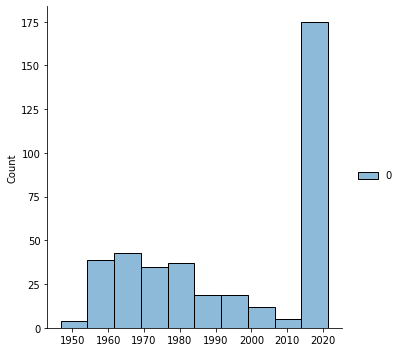

In [546]:
# Выводим на график предсказанные значения
sns.displot(data=pred)

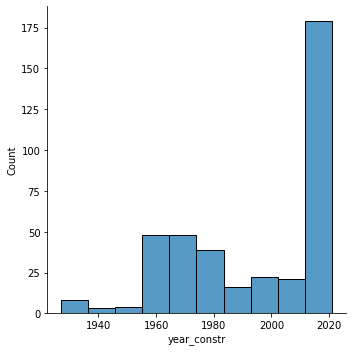

In [547]:
#  выводим на график истинные значения
sns.displot(data=y_test)

In [ ]:
# Ну что сказать. Мне кажется, что это намного лучше, чем заполнять пустые значения средним по столбцу или нулями.
# Да и у гадалок, наверняка всё ещё хуже по оценке предсказаний.
# утешаю себя, ведь угроблен целый день на то, что даёт ошибку в среднем на 4 года.
# Первая моя модель вообще не училась и указывала год постройки 20-40 до нашей эры.



In [ ]:
# Дальше идёт всякая шляпа из стажировки с курсов на Аналитика данных. Все это уже было, разве что тест производительности
# разных методов изменения значений столбцов можно глянуть. Ещё квантили и ящики с усами (звучит страшно, я бы не стал)

In [ ]:
# Всем, кто дочитал - хорошего дня! Пока.

In [12]:
# переводим стобец с Ценой из типа тсрока в инт, убираем все нечисловые значения
stat_data['Цена'].apply(lambda x: int(''.join([i for i in x if i.isdigit()])))

0         5250000
1        22297600
2        15660826
3         5945490
4        27170560
           ...   
12996     4196491
12997     4196491
12998     5733626
12999     4130670
13000     4147989
Name: Цена, Length: 13001, dtype: int64

In [16]:
# то же самое, что и на предыдущем шаге, только через регулярки
stat_data['Очищенная Цена'] = stat_data['Цена'].apply(lambda x: int(re.sub("\D", "", x)))
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            13001 non-null  object 
 1   Заголовок                      13001 non-null  object 
 2   Новостройка                    6080 non-null   object 
 3   Этап строительства             5812 non-null   object 
 4   Год постройки                  7025 non-null   float64
 5   Класс жилья                    5812 non-null   object 
 6   МЦК                            7633 non-null   object 
 7   Кол-во просмотров              13001 non-null  int64  
 8   Кол-во просмотров сегодня      7224 non-null   float64
 9   Описание                       12263 non-null  object 
 10  Информация                     13001 non-null  object 
 11  Адрес                          13001 non-null  object 
 12  Тип здания                     12897 non-null 

In [33]:
# сортируем цену за м.кв. в порядке убывания, предварительно преобразовав данные в число, убрав нечисловые символы
stat_data['цена за м²'].apply(lambda x: int(''.join([i for i in x if i.isdigit()]))).sort_values(ascending=False)

10099    2277778
5353     1800000
10124    1433349
8317     1292877
1257     1282946
          ...   
10107       7500
11272       7199
10940       4499
10913       4499
10914       4499
Name: цена за м², Length: 13001, dtype: int64

In [29]:
# смотрим кол-во заполненных ячеек в столбце Площадь кухни
pd.notna(stat_data['Площадь кухни']).sum()

11821

In [4]:
# проверяем методы преобразования данных на скорость выполнения операции
%%timeit
stat_data['Цена'].apply(lambda x: int(''.join([i for i in x if i.isdigit()])))

47.6 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
# метод с регулярным выражением проиграл. Ещё один повод не использовать регулярки.
%%timeit
stat_data['Цена'].apply(lambda x: int(re.sub("\D", "", x)))

67.9 ms ± 751 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# Далее выводим различные показатели колонок/всего датасета

In [3]:
# минимальное знач в колонке
stat_data['Год постройки'].min()

1876.0

In [4]:
# среднее значение в колонке
stat_data['Год постройки'].mean()

2001.1397864768683

In [5]:
# медианное значение в колонке
stat_data['Год постройки'].median()

2018.0

In [6]:
# кванитль ниже этого значения находятся 10% квартир (в случае 0.1), выше 90%
stat_data['Год постройки'].quantile(0.10)

1962.0

In [7]:
# как и выше, только теперь выборка делится на 25% и 75%
stat_data['Год постройки'].quantile(0.25)

1979.0

In [9]:
# выводим основные показатели всей колонки
stat_data['Год постройки'].describe()

count    7025.000000
mean     2001.139786
std        25.060692
min      1876.000000
25%      1979.000000
50%      2018.000000
75%      2019.000000
max      2021.000000
Name: Год постройки, dtype: float64

In [10]:
# выводим основные показатели всех числовых колонок
stat_data.describe()

,Год постройки,Кол-во просмотров,Кол-во просмотров сегодня,Количество этажей,Количество комнат,Этажность,Номер этажа
count,7025.000000,13001.000000,7224.000000,12510.000000,13001.000000,13001.000000,13001.000000
mean,2001.139786,94.524190,1.844546,17.488649,1.974848,17.444043,8.624798
std,25.060692,199.666472,2.712400,19.682982,0.912510,9.728213,6.693463
min,1876.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1979.000000,35.000000,1.000000,12.000000,1.000000,12.000000,3.000000
50%,2018.000000,65.000000,1.000000,16.000000,2.000000,16.000000,7.000000
75%,2019.000000,97.000000,2.000000,22.000000,3.000000,22.000000,12.000000
max,2021.000000,5739.000000,38.000000,1960.000000,25.000000,100.000000,95.000000


<AxesSubplot:>

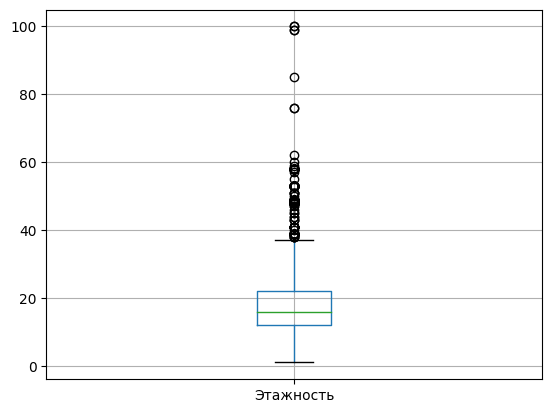

In [13]:
# рисуем боксплот, смотрим на выбросы, медиану, основной стэк покзаателей
stat_data.boxplot('Этажность')

<AxesSubplot:>

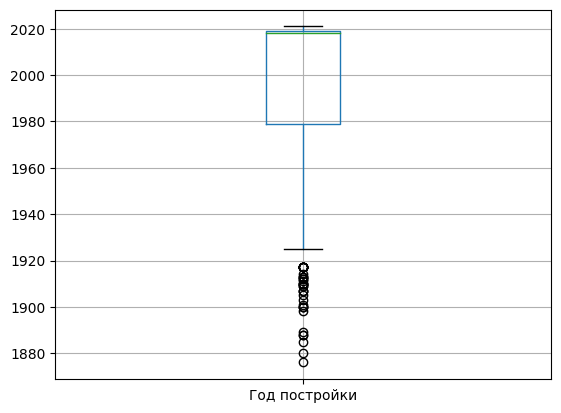

In [18]:
#  строим боксплот, удаляя строки с отсутствующими значениями этой колонки 
stat_data[['Год постройки']].dropna().boxplot()

<AxesSubplot:>

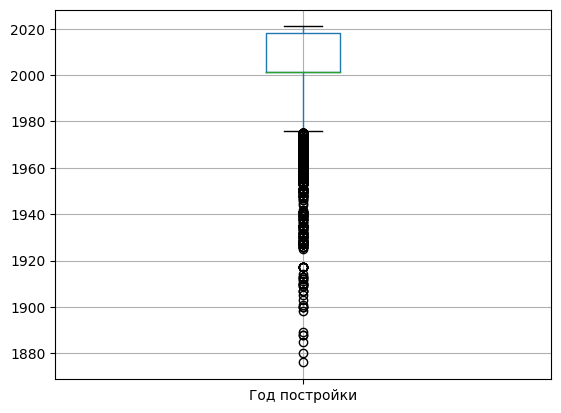

In [22]:
# строим боксплот, заполняя средним значением пустые ячейки колонки
stat_data[['Год постройки']].fillna(stat_data['Год постройки'].mean()).boxplot()

In [ ]:
# Вообще, пустые ячейки можно заполнять тем, чем требуется. 
# Можно разбить сет на 2 части: с отсутствующими ячейками в колонке и остальным сетом и скормить сет нейросети/ML алгоритму
# чтобы он заполнил ячейки сам, на первой половине сета после обучения на второй. Целевйо столбец - тот, что с пустыми ячейками

(-3.700000000000001, 50.0)

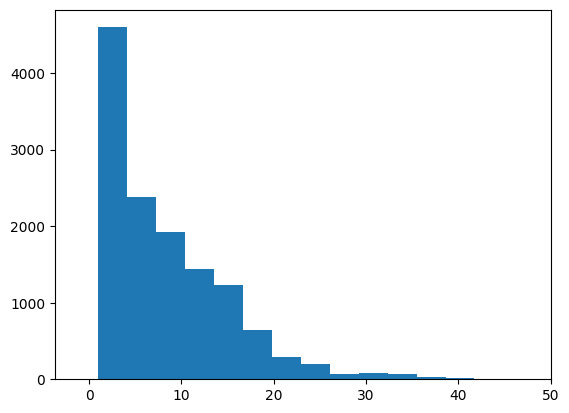

In [28]:
# строим гистограмму, в параметрах колонка, ширина показателей на графике
plt.hist(stat_data['Номер этажа'], bins=30)
#  отсекаем с графика выбросы, путем ограничений по оси x справа и(или) слева
plt.xlim((None,50))

(-3.95, 50.0)

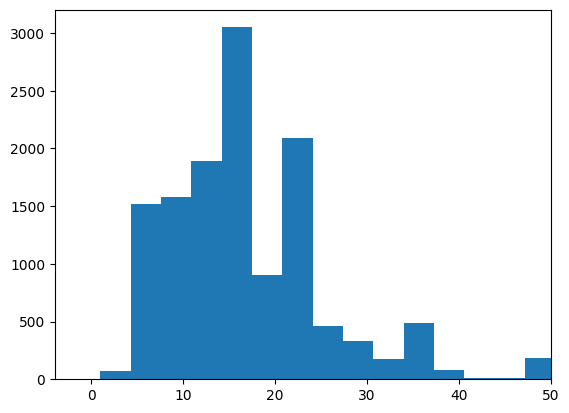

In [30]:
# то же самое, просто отрисована другая колонка для теста на курсах
plt.hist(stat_data['Этажность'], bins=30)
plt.xlim((None,50))